In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
nll_data_image_component = "./data_processed/Image_Components_GMM_results.csv"
nll_data_overall_gmm = "./data_processed/Overall_GMM_results.csv"
nll_data_overfitted_overall_gmm = "./data_processed/Overfitted_Overall_GMM_results.csv"

In [ ]:
import csv
import re
import numpy as np
import math
from collections import defaultdict

def read_csv_to_2d_array(file_path):
    data_dict = defaultdict(lambda: defaultdict(lambda: None))
    
    # Regular expression to parse participant ID and session number
    pattern = re.compile(r'(P\d+)\sS(\d+)')
    
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            # Split participant ID and session number
            match = pattern.match(row[0])
            if match:
                participant_id = match.group(1)
                session_number = int(match.group(2)) - 1  # Convert to zero-indexed
                
                # Store the float value in the dictionary
                data_dict[participant_id][session_number] = float(row[1])
    
    # Find the maximum number of sessions to define the array size
    max_sessions = max(max(sessions.keys()) for sessions in data_dict.values()) + 1
    participants = sorted(data_dict.keys())
    
    # Initialize a 2D array with None
    result_array = [[None] * max_sessions for _ in range(len(participants))]
    
    for i, participant_id in enumerate(participants):
        for session_number, value in data_dict[participant_id].items():
            result_array[i][session_number] = value
    
    return result_array, participants
print("------------------------Overall------------------------")
overall_array, overall_participants = read_csv_to_2d_array(nll_data_overall_gmm)
last_elements = [row.pop() for row in overall_array]
# Print the array
for participant, row in zip(overall_participants, overall_array):
    print(f"{participant}: {row}")
print("--------------------Image Component--------------------")
ic_array, ic_participants = read_csv_to_2d_array(nll_data_image_component)
last_elements = [row.pop() for row in ic_array]
# Print the array
for participant, row in zip(ic_participants, ic_array):
    print(f"{participant}: {row}")
print("----------------------Overfitted-----------------------")
overfitted_array, overfitted_participants = read_csv_to_2d_array(nll_data_overfitted_overall_gmm)
last_elements = [row.pop() for row in overfitted_array]
# Print the array
for participant, row in zip(overfitted_participants, overfitted_array):
    print(f"{participant}: {row}")

In [4]:
other_pid = ['P6', 'P7', 'P8', 'P9', 'P10', 'P12', 'P13', 'P14', 'P16', 'P19', 'P22', 'P24']

cognitive_normal_pid = ['P2', 'P15', 'P18', 'P21', 'P23', 'P25']

In [5]:
def create_df_from_raw_data_array(participants, array, verbose=False, is_entropy_file=False):
    df_all = pd.DataFrame(columns=['PID', 'Session', 'NLL', 'Group'])
    
    for participant, row in zip(participants, array):
        if verbose:
            print(f"{participant}: {row}")
        group = "Excluded"
        pid = int(participant[1:])
        if verbose:
            print(pid)
        if participant in other_pid:
            group = "Other"
        if participant in cognitive_normal_pid:
            group = "CN" #Cognitive Normal
        for session in range(5):
            df_all = pd.concat([df_all, pd.DataFrame({'PID': [participant], 'Session': [f"S{session + 1}"], 'NLL': [array[pid - 1][session]], 'Group':[group]})], ignore_index=True)
    
    df_all = df_all[df_all["Group"] != "Excluded"]
    if is_entropy_file:
        df_all.rename(columns={"NLL": "Entropy"}, inplace=True)
    
    df_cookie = df_all[df_all["Session"].isin(["S1", "S3", "S5"])]
    df_picnic = df_all[df_all["Session"].isin(["S2", "S4"])]
    if verbose:
        print(df_all)
        print(df_cookie)
        print(df_picnic)
    return df_all, df_cookie, df_picnic

In [6]:
ic_df_all, ic_df_cookie, ic_df_picnic = create_df_from_raw_data_array(ic_participants, ic_array)
overall_df_all, overall_df_cookie, overall_df_picnic = create_df_from_raw_data_array(overall_participants, overall_array)
overfitted_df_all, overfitted_df_cookie, overfitted_df_picnic = create_df_from_raw_data_array(overfitted_participants, overfitted_array)

In [ ]:
print(ic_df_all)
print(overall_df_all)
print(overfitted_df_all)

In [8]:
import pandas as pd
import seaborn as sns
from utils import plotting
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

In [9]:
def plot_group_stat(df, title, pairs, x, y, hue):
    # pairs = [("CN", "Other")]
    fig, ax = plt.subplots(figsize=(6, 4))

    with plotting.paper_theme():
        sns.boxplot(data=df, x=x, y=y,
                    hue=hue, width=.5, ax=ax)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_title(title, pad=25)

        annotator = Annotator(ax, pairs, data=df,
                              x=x, y=y)
        annotator.configure(test="Brunner-Munzel",
                            text_format="star", loc="outside")
        annotator.apply_and_annotate()

    fig.tight_layout(rect=[0, 0, 1, 0.95])    # keep layout tidy
    plt.show()
    plt.close(fig)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Other vs. CN: Brunner-Munzel test, P_val:6.070e-02 W=1.921e+00


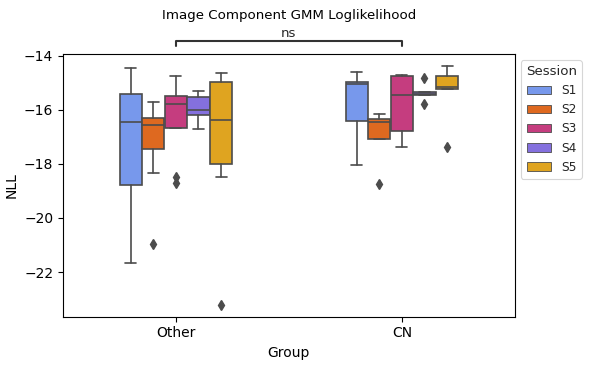

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Other vs. CN: Brunner-Munzel test, P_val:9.176e-02 W=1.717e+00


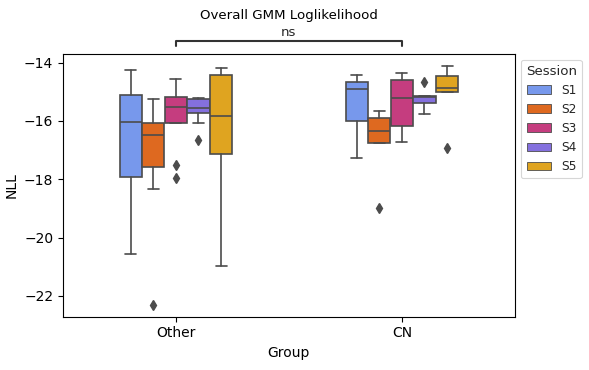

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Other vs. CN: Brunner-Munzel test, P_val:2.640e-02 W=2.286e+00


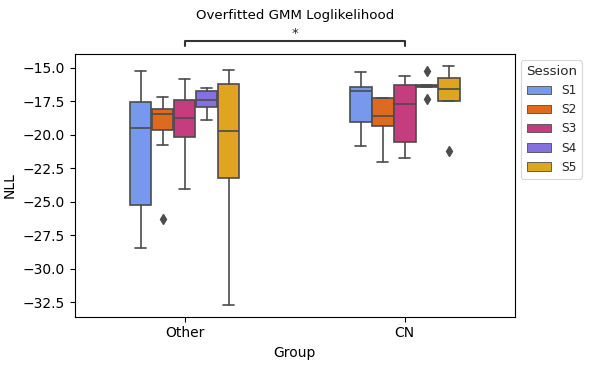

In [10]:
plot_group_stat(ic_df_all, "Image Component GMM Loglikelihood", [("CN", "Other")], "Group", "NLL", "Session")

plot_group_stat(overall_df_all, "Overall GMM Loglikelihood", [("CN", "Other")], "Group", "NLL", "Session")

plot_group_stat(overfitted_df_all, "Overfitted GMM Loglikelihood", [("CN", "Other")], "Group", "NLL", "Session")

In [11]:
entropy_data_image_component = "./data_processed/Image_Components_Entropy_results.csv"
entropy_data_overall_gmm = "./data_processed/Overall_Entropy_results.csv"
entropy_data_overfitted_overall_gmm = "./data_processed/Overfitted_Entropy_results.csv"

In [ ]:
print("------------------------Overall------------------------")
overall_array, overall_participants = read_csv_to_2d_array(entropy_data_overall_gmm)
last_elements = [row.pop() for row in overall_array]
# Print the array
for participant, row in zip(overall_participants, overall_array):
    print(f"{participant}: {row}")
print("--------------------Image Component--------------------")
ic_array, ic_participants = read_csv_to_2d_array(entropy_data_image_component)
last_elements = [row.pop() for row in ic_array]
# Print the array
for participant, row in zip(ic_participants, ic_array):
    print(f"{participant}: {row}")
print("----------------------Overfitted-----------------------")
overfitted_array, overfitted_participants = read_csv_to_2d_array(entropy_data_overfitted_overall_gmm)
last_elements = [row.pop() for row in overfitted_array]
# Print the array
for participant, row in zip(overfitted_participants, overfitted_array):
    print(f"{participant}: {row}")

In [16]:
ic_entropy_df_all, ic_entropy_cookie, ic_entropy_picnic = create_df_from_raw_data_array(ic_participants, ic_array, is_entropy_file=True)
overall_entropy_df_all, overall_entropy_df_cookie, overall_entropy_df_picnic = create_df_from_raw_data_array(overall_participants, overall_array, is_entropy_file=True)
overfitted_entropy_df_all, overfitted_entropy_df_cookie, overfitted_entropy_df_picnic = create_df_from_raw_data_array(overfitted_participants, overfitted_array, is_entropy_file=True)

In [ ]:
print(ic_entropy_df_all)
print(overall_entropy_df_all)
print(overfitted_entropy_df_all)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Other vs. CN: Brunner-Munzel test, P_val:7.353e-01 W=3.396e-01


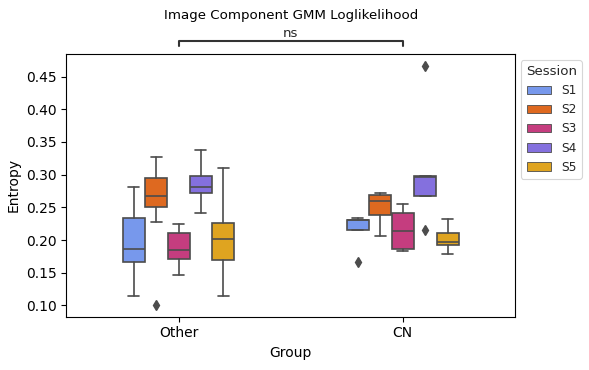

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Other vs. CN: Brunner-Munzel test, P_val:1.753e-01 W=-1.374e+00


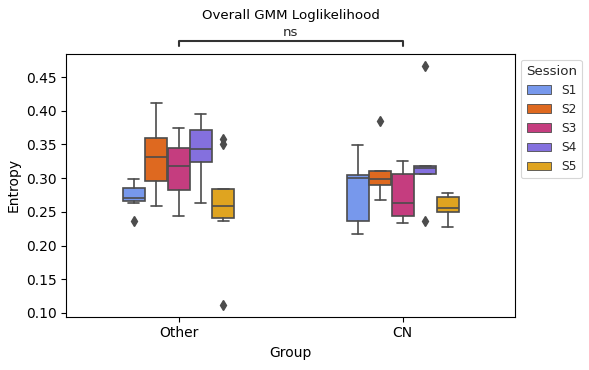

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Other vs. CN: Brunner-Munzel test, P_val:7.196e-01 W=-3.608e-01


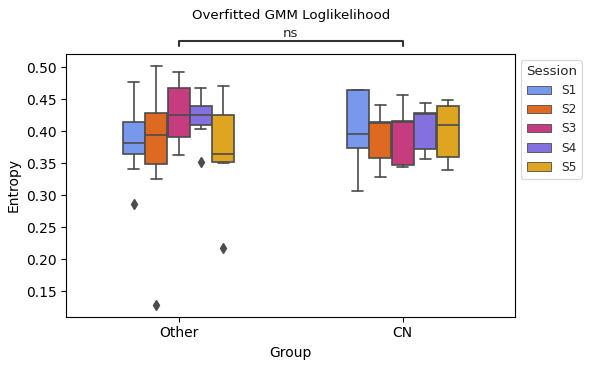

In [21]:
# test_df = ic_df_all[ic_df_all.Session.isin(["S1", "S5"])]
# print(ic_df_all)

plot_group_stat(ic_entropy_df_all, "Image Component GMM Loglikelihood", [("CN", "Other")], "Group", "Entropy", "Session")

plot_group_stat(overall_entropy_df_all, "Overall GMM Loglikelihood", [("CN", "Other")], "Group", "Entropy", "Session")

plot_group_stat(overfitted_entropy_df_all, "Overfitted GMM Loglikelihood", [("CN", "Other")], "Group", "Entropy", "Session")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

S1 vs. S5: Brunner-Munzel test, P_val:6.046e-01 W=5.248e-01


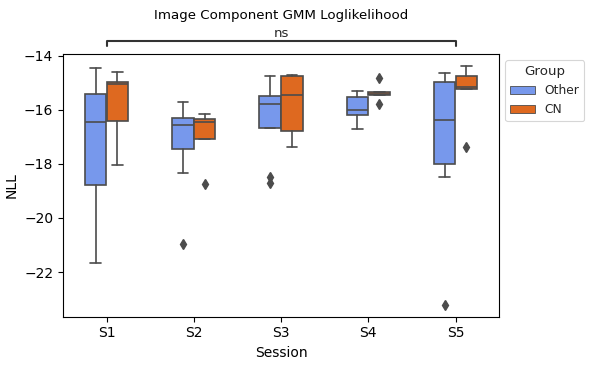

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

S1 vs. S5: Brunner-Munzel test, P_val:5.037e-01 W=6.794e-01


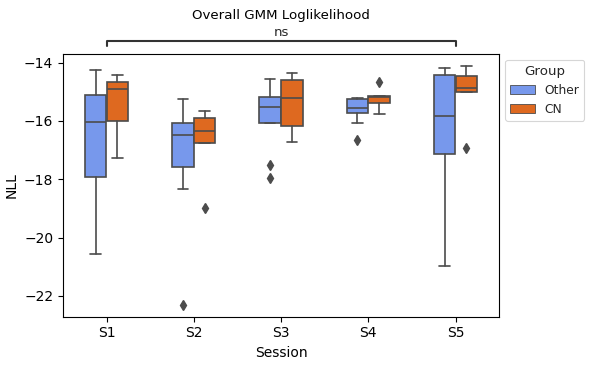

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

S1 vs. S5: Brunner-Munzel test, P_val:5.412e-01 W=6.206e-01


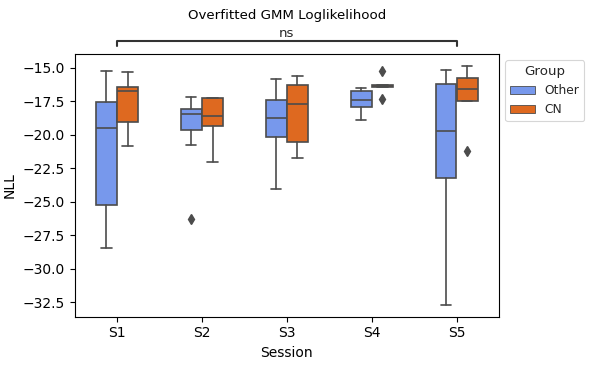

In [22]:
plot_group_stat(ic_df_all, "Image Component GMM Loglikelihood", [("S1", "S5")], "Session", "NLL", "Group")

plot_group_stat(overall_df_all, "Overall GMM Loglikelihood", [("S1", "S5")], "Session", "NLL", "Group")

plot_group_stat(overfitted_df_all, "Overfitted GMM Loglikelihood", [("S1", "S5")], "Session", "NLL", "Group")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

S1 vs. S5: Brunner-Munzel test, P_val:7.881e-01 W=-2.718e-01


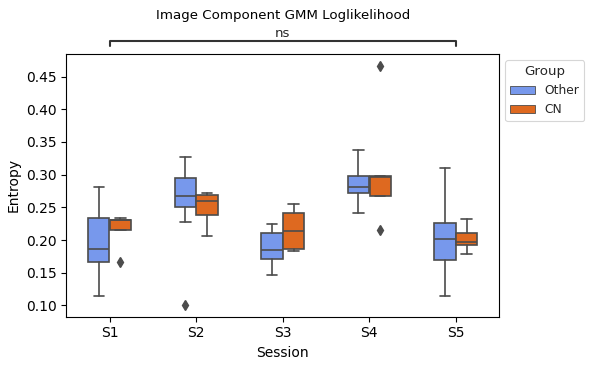

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

S1 vs. S5: Brunner-Munzel test, P_val:2.338e-01 W=-1.222e+00


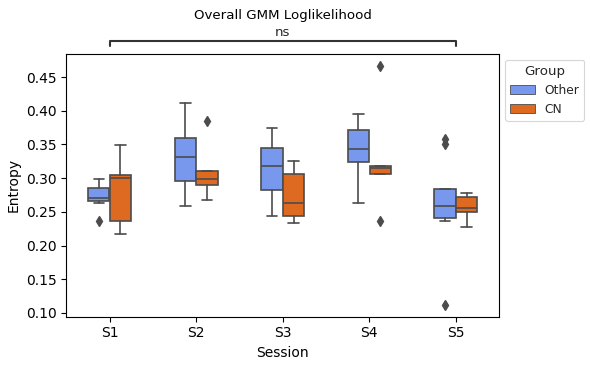

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

S1 vs. S5: Brunner-Munzel test, P_val:6.795e-01 W=-4.182e-01


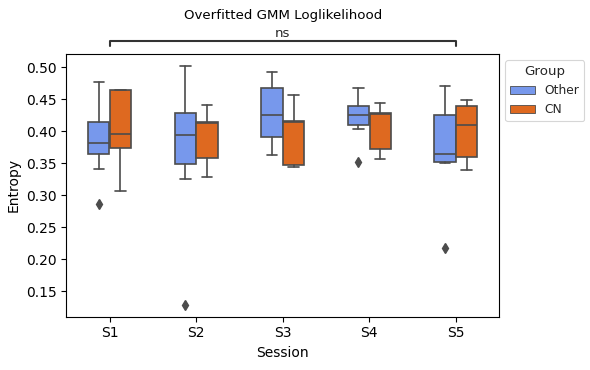

In [23]:
# test_df = ic_df_all[ic_df_all.Session.isin(["S1", "S5"])]
# print(ic_df_all)

plot_group_stat(ic_entropy_df_all, "Image Component GMM Loglikelihood", [("S1", "S5")], "Session", "Entropy", "Group")

plot_group_stat(overall_entropy_df_all, "Overall GMM Loglikelihood", [("S1", "S5")], "Session", "Entropy", "Group")

plot_group_stat(overfitted_entropy_df_all, "Overfitted GMM Loglikelihood", [("S1", "S5")], "Session", "Entropy", "Group")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

S1 vs. S5: Brunner-Munzel test, P_val:6.046e-01 W=5.248e-01


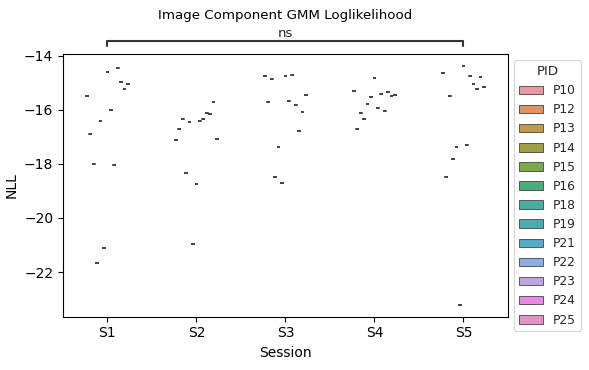

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

S1 vs. S5: Brunner-Munzel test, P_val:5.037e-01 W=6.794e-01


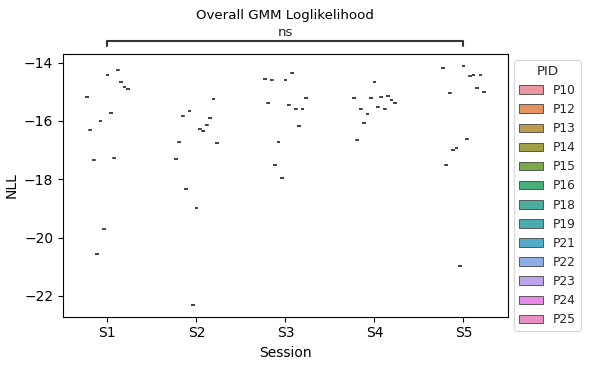

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

S1 vs. S5: Brunner-Munzel test, P_val:5.412e-01 W=6.206e-01


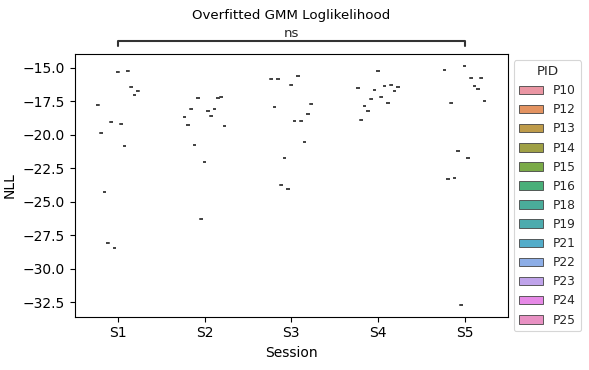

In [25]:
plot_group_stat(ic_df_all, "Image Component GMM Loglikelihood", [("S1", "S5")], "Session", "NLL", "PID")

plot_group_stat(overall_df_all, "Overall GMM Loglikelihood", [("S1", "S5")], "Session", "NLL", "PID")

plot_group_stat(overfitted_df_all, "Overfitted GMM Loglikelihood", [("S1", "S5")], "Session", "NLL", "PID")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

S1 vs. S5: Brunner-Munzel test, P_val:7.881e-01 W=-2.718e-01


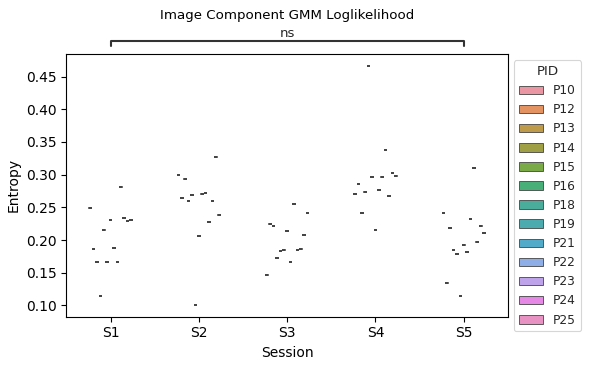

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

S1 vs. S5: Brunner-Munzel test, P_val:2.338e-01 W=-1.222e+00


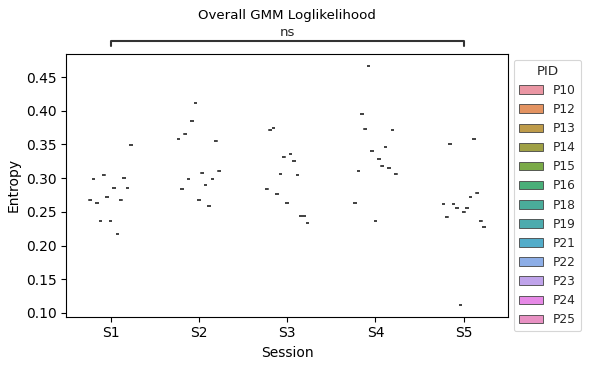

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

S1 vs. S5: Brunner-Munzel test, P_val:6.795e-01 W=-4.182e-01


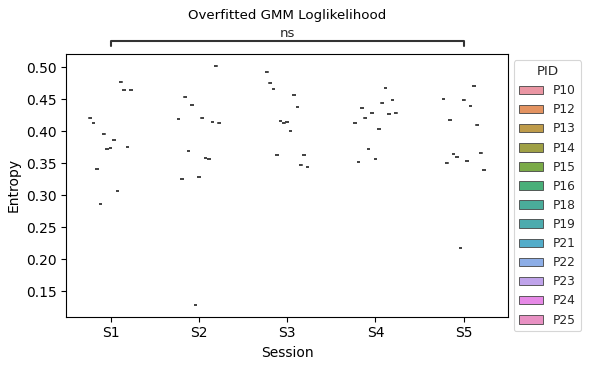

In [26]:
# test_df = ic_df_all[ic_df_all.Session.isin(["S1", "S5"])]
# print(ic_df_all)

plot_group_stat(ic_entropy_df_all, "Image Component GMM Loglikelihood", [("S1", "S5")], "Session", "Entropy", "PID")

plot_group_stat(overall_entropy_df_all, "Overall GMM Loglikelihood", [("S1", "S5")], "Session", "Entropy", "PID")

plot_group_stat(overfitted_entropy_df_all, "Overfitted GMM Loglikelihood", [("S1", "S5")], "Session", "Entropy", "PID")